# Non-Linearly Separable Data
## CSC2034
### Cameron Trotter (c.trotter2@ncl.ac.uk)

### Google Colab Setup

All of the notebooks you will be running in these lab sessions are designed to be ran using [Google Colab](https://colab.research.google.com/). For setup instructions, see this repo's README. 

In order to make things work on colab, we need to clone this repo and then (in another cell because colab dictates this...) move into the repo directory.

In [1]:
!git clone https://github.com/Trotts/csc2034-ds-demos.git

Cloning into 'csc2034-ds-demos'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 127 (delta 49), reused 107 (delta 32), pack-reused 0
Receiving objects: 100% (127/127), 3.66 MiB | 5.90 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
import os
os.chdir('csc2034-ds-demos')

### Building Synthetic Data

As well as being able to produce linearly separable data, `sklearn` can also produce non-linarly separable data. This data cannot be split using a single line, e.g. data which is *circular*. Like the first notebook, let's build a synthetic dataset to work with. 

Task: Using sklearn's `make_circles` method, build a non-linearly separable dataset. The [docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) may help you. I have provided the hyperparameters you will need. 

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
noise = 0.1
factor = 0.5
random_state = 1

data, labels = make_circles(n_samples, noise=noise, random_state=random_state, factor=factor)

Now we have a dataset, let's visualise it.

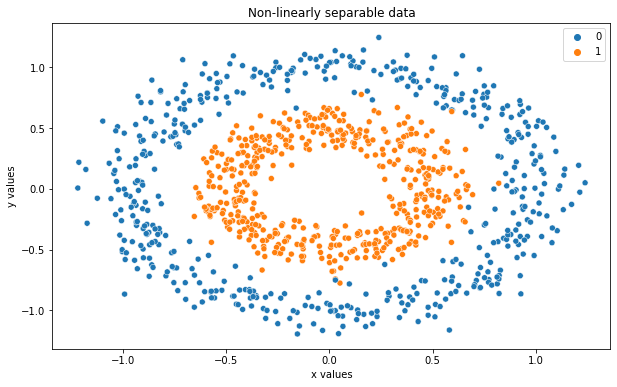

In [4]:
from helpers import show_scatterplot

show_scatterplot(data, labels, 'Non-linearly separable data')

### Can We Use Linear Models?

As you might be able to tell from the scatterplot above, it will not be possible with the data distribution we have created to generate a line of best fit. To prove this, we can try. 

Task: Create a Logistic Regression model, based on the code from `01-linearly-separable-data`, fit it to the dataset, generate a line of best fit, and predict on the test set. Remeber to split and scale your data!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Delete below except data_train/test, labels_train/test, logistic_regression_label_predictions
data_train, data_test, labels_train,  labels_test = #...

#...

logistic_regression_label_predictions = #...

Let's plot the line of best fit, and output some evaluation metrics.

In [ ]:
from helpers import plot_linear_fit
from sklearn.metrics import accuracy_score


plot_linear_fit(logistic_regression, data_test_scaled, labels_test,
                "Logistic regression line of best fit and test data")


test_acc = accuracy_score(labels_test, logistic_regression_label_predictions)


print(f"Test acc: {test_acc * 100}%")

Run the below checks. If any return False, take another look at the code you have written before continuing. 

In [ ]:
print(f"Test acc check: {test_acc == 0.45}")

The line of best fit generated by the model is not capable of capturing the non-linearity of data, and this is reflected in the low test accuracy. 

### Using Non-Linear Models

#### Decision Trees

Some models however can be used for linear or non-linear datasets. One of these is decision trees. 

Task: Create a Decision Tree model, based on the code from `01-linearly-separable-data`, fit it to the dataset, and predict on the test set. 

In [ ]:
from sklearn import tree

decision_tree = #...

print(f"Test acc: {test_acc * 100}%")

Run the below checks. If any return False, take another look at the code you have written before continuing. 

In [ ]:
print(f"Test acc check: {test_acc == 0.975}")

Let's visualise the state space produced by the decision tree...

In [ ]:
from helpers import plot_contour_fit

plot_contour_fit(decision_tree, data_train_scaled, labels_train, data_test_scaled, labels_test)


The state space is capable of capturing the non-lineararity of the data. We can also visualise the tree using `graphviz`, but this may not be very informative for our generated data. 

#### Non-Linear SVM

SVMs are another model that can be either linear or non-linear. This depends on the kernel hyperparameter. Like before, lets see how a linear SVM performs on the data.

Task: Create a Linear SVM model, based on the code from `01-linearly-separable-data`, fit it to the dataset, and predict on the test set. 

In [ ]:
from sklearn.svm import LinearSVC

svm = #...

print(f"Test acc: {test_acc * 100}%")
plot_linear_fit(svm, data_test_scaled, labels_test,
                "Linear SVM fit on test data")

Not much better than the Logistic Regression. What about if we change the kernel so that we can work with non-linear data? For this, we can utilise sklearn's `SVC` model implementation, the docs for which can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Task: Build a non-linear SVM using the following hyperparameters, fit it to the data, and use it to predict on the test set. 

In [ ]:
from sklearn.svm import SVC

kernel = 'poly'
degree = 3
C = 5
coef0 = 1

non_linear_svm = #...

print(f"Test acc: {test_acc * 100}%")
plot_contour_fit(non_linear_svm, data_train_scaled, labels_train,
                 data_test_scaled, labels_test)

There are multiple different non-linear kernels we can use. How does utilising another effect the SVM?

Task: Implement a non-linear SVM with the `rbf` kernel, and produce a test accuracy and plot.

In [ ]:
#...

print(f"Test acc: {test_acc * 100}%")
plot_contour_fit(non_linear_svm, data_train_scaled, labels_train,
                 data_test_scaled, labels_test)

Your state space should now be completely different, however the accuracy is very similar. A little bit of this is due to the ease of the data we created. Try out other hyperparameters and see if you can get better!